In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [172]:
'''
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int32  
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   int64  
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   int32  
 8   Genres          9360 non-null   object 
 9   Category_c      9360 non-null   int32  
 10  Genres_c        9360 non-null   int32
 '''

'\n 0   Category        9360 non-null   object \n 1   Rating          9360 non-null   float64\n 2   Reviews         9360 non-null   int32  \n 3   Size            9360 non-null   float64\n 4   Installs        9360 non-null   int64  \n 5   Type            9360 non-null   int64  \n 6   Price           9360 non-null   float64\n 7   Content Rating  9360 non-null   int32  \n 8   Genres          9360 non-null   object \n 9   Category_c      9360 non-null   int32  \n 10  Genres_c        9360 non-null   int32\n '

In [173]:
# df['Category'].unique(), df['Category'].nunique()

In [242]:
# out = df.drop(['Genres','Installs','Category_c','Genres_c'], axis=1)
# out

,Category,Rating,Reviews,Size,Type,Price,Content Rating
0,ART_AND_DESIGN,4.1,159,19000000.0,0,0.0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,0,0.0,0
2,ART_AND_DESIGN,4.7,87510,8700000.0,0,0.0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,0,0.0,1
4,ART_AND_DESIGN,4.3,967,2800000.0,0,0.0,0
...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2600000.0,0,0.0,0
10836,FAMILY,4.5,38,53000000.0,0,0.0,0
10837,FAMILY,5.0,4,3600000.0,0,0.0,0
10839,BOOKS_AND_REFERENCE,4.5,114,3600000.0,0,0.0,3


In [243]:
# col = ['Category','Content Rating','Price','Type','Rating','Reviews','Size']
# out[col]

,Category,Content Rating,Price,Type,Rating,Reviews,Size
0,ART_AND_DESIGN,0,0.0,0,4.1,159,19000000.0
1,ART_AND_DESIGN,0,0.0,0,3.9,967,14000000.0
2,ART_AND_DESIGN,0,0.0,0,4.7,87510,8700000.0
3,ART_AND_DESIGN,1,0.0,0,4.5,215644,25000000.0
4,ART_AND_DESIGN,0,0.0,0,4.3,967,2800000.0
...,...,...,...,...,...,...,...
10834,FAMILY,0,0.0,0,4.0,7,2600000.0
10836,FAMILY,0,0.0,0,4.5,38,53000000.0
10837,FAMILY,0,0.0,0,5.0,4,3600000.0
10839,BOOKS_AND_REFERENCE,3,0.0,0,4.5,114,3600000.0


In [244]:
# col = ['Category','Content Rating','Price','Type','Rating','Reviews','Size']
# out.rename(columns={
#     'Category' : 'Category',
#     'Content Rating' : 'Avalible age',
#     'Price' : 'Price',
#     'Type' : 'Free',
#     'Rating' : 'Rating',
#     'Reviews' : 'Reviews',
#     'Size' : 'Size'
# }, inplace=True)
# out

,Category,Rating,Reviews,Size,Free,Price,Avalible age
0,ART_AND_DESIGN,4.1,159,19000000.0,0,0.0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,0,0.0,0
2,ART_AND_DESIGN,4.7,87510,8700000.0,0,0.0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,0,0.0,1
4,ART_AND_DESIGN,4.3,967,2800000.0,0,0.0,0
...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2600000.0,0,0.0,0
10836,FAMILY,4.5,38,53000000.0,0,0.0,0
10837,FAMILY,5.0,4,3600000.0,0,0.0,0
10839,BOOKS_AND_REFERENCE,4.5,114,3600000.0,0,0.0,3


In [245]:
# out['Size'] = (out['Size'] / (1024*1024)).round().astype(int)
# out['Price'] = out['Price'].round().astype(int)
# out['Rating'] = out['Rating'].round(2)
# out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      9360 non-null   object 
 1   Rating        9360 non-null   float64
 2   Reviews       9360 non-null   int32  
 3   Size          9360 non-null   int32  
 4   Free          9360 non-null   int64  
 5   Price         9360 non-null   int32  
 6   Avalible age  9360 non-null   int32  
dtypes: float64(1), int32(4), int64(1), object(1)
memory usage: 438.8+ KB


In [246]:
# out

,Category,Rating,Reviews,Size,Free,Price,Avalible age
0,ART_AND_DESIGN,4.1,159,18,0,0,0
1,ART_AND_DESIGN,3.9,967,13,0,0,0
2,ART_AND_DESIGN,4.7,87510,8,0,0,0
3,ART_AND_DESIGN,4.5,215644,24,0,0,1
4,ART_AND_DESIGN,4.3,967,3,0,0,0
...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2,0,0,0
10836,FAMILY,4.5,38,51,0,0,0
10837,FAMILY,5.0,4,3,0,0,0
10839,BOOKS_AND_REFERENCE,4.5,114,3,0,0,3


In [247]:
# df['Content Rating'].unique()

In [248]:
# out.reset_index(drop = True, inplace = True)
# out

,Category,Rating,Reviews,Size,Free,Price,Avalible age
0,ART_AND_DESIGN,4.1,159,18,0,0,0
1,ART_AND_DESIGN,3.9,967,13,0,0,0
2,ART_AND_DESIGN,4.7,87510,8,0,0,0
3,ART_AND_DESIGN,4.5,215644,24,0,0,1
4,ART_AND_DESIGN,4.3,967,3,0,0,0
...,...,...,...,...,...,...,...
9355,FAMILY,4.0,7,2,0,0,0
9356,FAMILY,4.5,38,51,0,0,0
9357,FAMILY,5.0,4,3,0,0,0
9358,BOOKS_AND_REFERENCE,4.5,114,3,0,0,3


In [249]:
# out.to_excel('google_tableau.xlsx')

In [182]:
df = pd.read_csv('../dataset/googleplaystore_data/googleplaystore.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


null값이 있음, 단순화를 위해 NaN값 삭제

In [183]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [184]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [185]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 범주형에서 연속형으로 데이터 타입 변경
- category 번호부여
- dict, array 이용
- #### Integer Encoding(변수간 연관O) / one-hot encoding(변수간 연관X)을 각각 하여 accuracy-score을 비교해볼 예정

In [186]:
category_str = df['Category'] # Series
category_val = df['Category'].unique()
category_val_cnt = len(category_val)
category_dict = {}

for i in range(0,category_val_cnt):
    category_dict[category_val[i]] = i

df['Category_c'] = df['Category'].map(category_dict).astype(int)
df.tail()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,18
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,18
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,18
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,3
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,16


In [187]:
df_sum = df['Rating'].sum()
dfrat = df['Rating']
leng = float(len(df['Rating']))
df_sum / leng

4.191837606837606

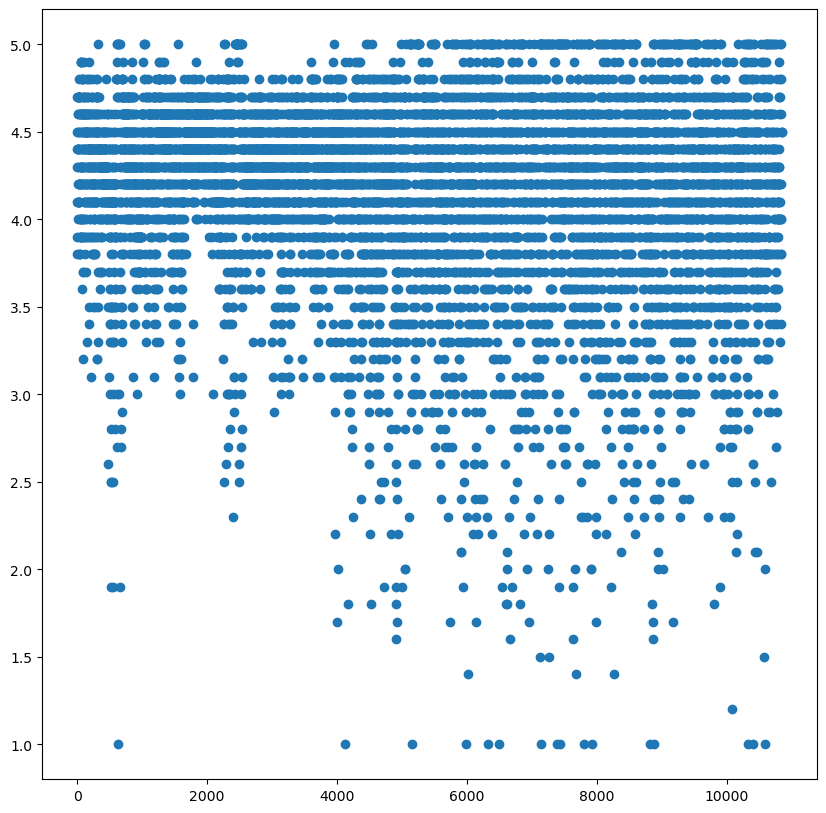

In [188]:
plt.figure(figsize=(10,10))
plt.scatter(x=dfrat.index, y=dfrat.values)
plt.show()

### size(파일크기), installs(다운로드수) 정수화.

In [189]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x) * 1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None
    
df['Size'] = df['Size'].map(change_size)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [190]:
df.Size.fillna(method='ffill', inplace=True)
df[df['Size'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c


In [191]:
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


### Type(유/무료) 이진형으로 정리하기

In [192]:
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


### 관계없는 컬럼 drop

In [193]:
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

### 연령, 장르 컬럼은 딕셔너리로 번호 부여하기
- list, ndarray 형태 구분
- dict에 할당하기전 array를 미리 할당
- for 문 활용

In [194]:
rating_list = df['Content Rating'].unique()
rating_list

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [195]:
type(rating_list)

numpy.ndarray

### 컨텐츠 등급 섹션은 원핫인코딩이 아닌 정수인코딩(연관성이 있을 수 있음.)

In [196]:
rating_dict = {}
for i in range(len(rating_list)):
    rating_dict[rating_list[i]] = i

df['Content Rating'] = df['Content Rating'].map(rating_dict).astype(int)
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0,0,Art & Design,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0,0,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0,0,Art & Design,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0,1,Art & Design,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0,0,Art & Design;Creativity,0


## genres컬럼 정수인코딩..
- ### one-hot encoding시에 독립변수가 상당히 많아짐.
- ### 범주형 컬럼의 부분 집합 이기도 함(?)

In [197]:
genres_list = df.Genres.unique()
len(genres_list), genres_list

(115,
 array(['Art & Design', 'Art & Design;Pretend Play',
        'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
        'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
        'Communication', 'Dating', 'Education;Education', 'Education',
        'Education;Creativity', 'Education;Music & Video',
        'Education;Action & Adventure', 'Education;Pretend Play',
        'Education;Brain Games', 'Entertainment',
        'Entertainment;Music & Video', 'Entertainment;Brain Games',
        'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
        'Health & Fitness', 'House & Home', 'Libraries & Demo',
        'Lifestyle', 'Lifestyle;Pretend Play',
        'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
        'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
        'Music', 'Word', 'Racing', 'Casual;Creativity',
        'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
        'Trivia', 'Role Playing', 'Si

In [198]:
genres_dict = {}
for i in range(len(genres_list)):
    genres_dict[genres_list[i]] = i
df['Genres_c'] = df['Genres'].map(genres_dict).astype(int)
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0,0,Art & Design;Creativity,0,2


### 가격 컬럼 실수화

In [199]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [200]:
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


### 리뷰 컬럼 정수화(<-object 타입)

In [201]:
df['Reviews'] = df['Reviews'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int32  
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   int64  
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   int32  
 8   Genres          9360 non-null   object 
 9   Category_c      9360 non-null   int32  
 10  Genres_c        9360 non-null   int32  
dtypes: float64(3), int32(4), int64(2), object(2)
memory usage: 731.2+ KB


## category 컬럼 dummies화 (one-hot encoding)

In [202]:
df2 = pd.get_dummies(df, columns=['Category'])
df2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Category_c', 'Genres_c',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATH

In [203]:
def evaluation_matrix(y_true, y_predict):
    print('mean_squared_error : ' + str(metrics.mean_squared_error(y_true, y_predict)))
    print('mean_absolute_error : ' + str(metrics.mean_absolute_error(y_true, y_predict)))
    print('mean_squared_log_error : ' + str(metrics.mean_squared_log_error(y_true, y_predict)))

In [204]:
def evaluation_matrix_dict(y_true, y_predict, name= 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true, y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    
    return dict_matrix

## 가장 자주 사용하는 모델 3가지(선형 회귀, SVR, 랜덤 포레스트 회귀)
- ### y : target은 'Rating' - 이산 변수가 아닌 "연속" 변수 임을 확인
- ### X : train data는 category, genres를 조절하여 이용.
    - #### 'category' 컬럼의 정수/원핫인코딩 의 비교
    - #### 'genres' 컬럼의 포함/미포함 의 비교

## 1. (Genres제외 / Category - Integer Encoding) - train, test

In [205]:
from sklearn.linear_model import LinearRegression

X = df.drop(labels=['Category', 'Rating', 'Genres', 'Genres_c'], axis=1)
y = df.Rating

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    )

In [206]:
model = LinearRegression()
model.fit(X_train, y_train)
results = model.predict(X_test)
results

array([4.22753118, 4.13592939, 4.25854946, ..., 4.31924151, 4.17461215,
       4.13798529])

In [207]:
evaluation_matrix_dict(y_test,results)

{'Series Name': 'Linear - Integer',
 'Mean Squared Error': 0.28405876920770856,
 'Mean Absolute Error': 0.37191361175573373,
 'Mean Squared Log Error': 0.013835699726585089}

In [208]:
# dftest = pd.DataFrame().from_dict(evaluation_matrix_dict(y_test,results), orient='index').transpose()
# dftest

In [209]:
results_df = pd.DataFrame()
results_df = results_df.from_dict(evaluation_matrix_dict(y_test,results), orient = 'index')
results_df = results_df.transpose()
results_df

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.284059,0.371914,0.013836


## 2. (Genres제외 / Category - onehot encoding) - train, test

In [210]:
df2

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0,...,False,False,False,False,False,False,False,False,False,False
1,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1,...,False,False,False,False,False,False,False,False,False,False
2,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0,...,False,False,False,False,False,False,False,False,False,False
3,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0,...,False,False,False,False,False,False,False,False,False,False
4,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,7,2600000.0,500,0,0.0,0,Education,18,12,...,False,False,False,False,False,False,False,False,False,False
10836,4.5,38,53000000.0,5000,0,0.0,0,Education,18,12,...,False,False,False,False,False,False,False,False,False,False
10837,5.0,4,3600000.0,100,0,0.0,0,Education,18,12,...,False,False,False,False,False,False,False,False,False,False
10839,4.5,114,3600000.0,1000,0,0.0,3,Books & Reference,3,5,...,False,False,False,False,False,False,False,False,False,False


In [211]:
X_d = df2.drop(labels=['Rating', 'Genres', 'Category_c', 'Genres_c'], axis=1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, 
                                                            test_size=0.30
                                                            )

In [212]:
model_d = LinearRegression()
model_d.fit(X_train_d, y_train_d)
results_d = model_d.predict(X_test_d)
results_d

array([4.20498879, 4.33569819, 4.14541722, ..., 4.31263172, 4.27701271,
       4.2444694 ])

In [213]:
evaluation_matrix_dict(y_test_d, results_d)

{'Series Name': 'Linear - Integer',
 'Mean Squared Error': 0.25049715342707757,
 'Mean Absolute Error': 0.34961143975314124,
 'Mean Squared Log Error': 0.012181380356029255}

In [214]:
# results_df2 = pd.DataFrame()
# results_df2 = results_df2.from_dict(evaluation_matrix_dict(y_test_d, results_d), orient='index')
# results_df2 = results_df2.transpose()
# results_df2

In [215]:
results_df2 = evaluation_matrix_dict(y_test_d, results_d, name='Linear - Dummy')
results_df2 = pd.DataFrame(results_df2, index=[0])  # 인덱스를 제공합니다.

results_df2

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Dummy,0.250497,0.349611,0.012181


In [216]:
print(type(results_df))
print(type(results_df2))
print(type(results_d))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [217]:
combined_df = pd.concat([results_df, results_df2], axis=1)
combined_df

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.284059,0.371914,0.013836,Linear - Dummy,0.250497,0.349611,0.012181


In [218]:
# results_df2 = evaluation_matrix_dict(y_test_d, results_d, name = 'Linear - Dummy')
# results_df2 = pd.DataFrame(results_df2)
# results_df = pd.concat([results_df, results_df2], ignore_index=True)
# results_df

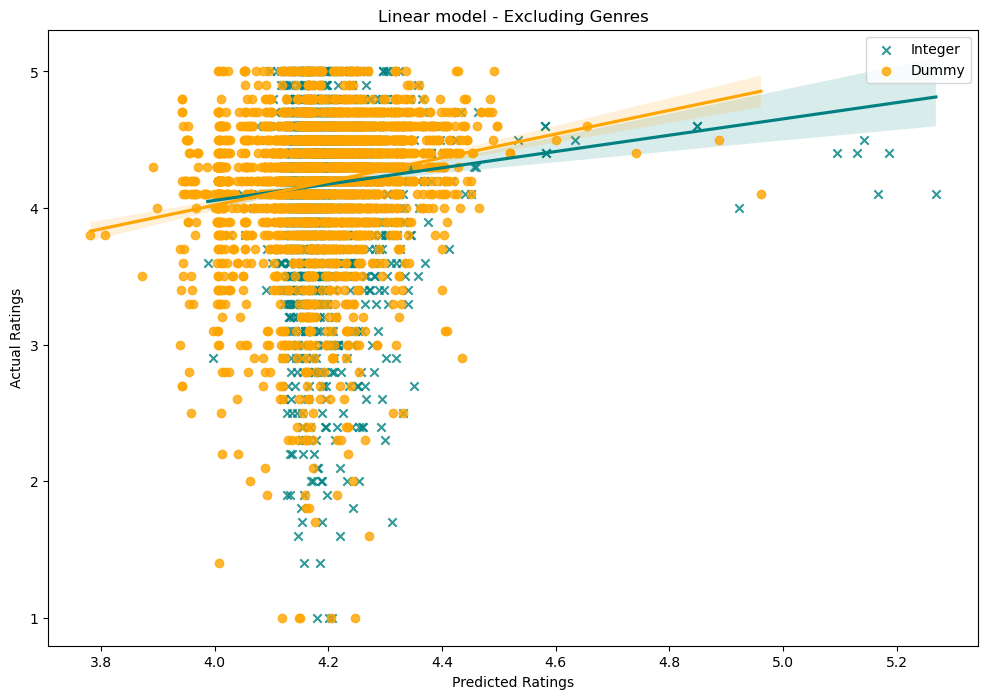

In [219]:
plt.figure(figsize=(12,8))
sns.regplot(x=results,y=y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(x=results_d,y=y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [220]:
print ('Actual mean of population:' + str(y.mean()))
print ('Integer encoding(mean) :' + str(results.mean()))
print ('Dummy encoding(mean) :'+ str(results_d.mean()))
print ('Integer encoding(std) :' + str(results.std()))
print ('Dummy encoding(std) :'+ str(results_d.std()))

Actual mean of population:4.191837606837606
Integer encoding(mean) :4.200146425880535
Dummy encoding(mean) :4.192325513037218
Integer encoding(std) :0.07839575782617628
Dummy encoding(std) :0.10670026358659657


## 3. (Genres_c 포함 / Category - Integer) 회귀모델 학습 결과. 

In [221]:
# 장르 포함 Integer 학습
X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30)

In [222]:
model = LinearRegression()
model.fit(X_train,y_train)
results = model.predict(X_test)
results

array([4.1231669 , 4.13107192, 4.28109501, ..., 4.22774284, 4.17692929,
       4.15639439])

In [223]:
results_df3 = evaluation_matrix_dict(y_test, results, name='Linear(inc Genre) - Integer')
results_df3 = pd.DataFrame(results_df3, index=[0])  # 인덱스를 제공합니다.
combined_df = pd.concat([combined_df, results_df3], axis=1)
combined_df

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.284059,0.371914,0.013836,Linear - Dummy,0.250497,0.349611,0.012181,Linear(inc Genre) - Integer,0.242009,0.351051,0.011312


## 4. (Genres포함 / Category - one-hot encoding) - train, test

In [224]:
# 장르 포함 더미 학습
X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
results_d = model_d.predict(X_test_d)

In [225]:
results_df2 = evaluation_matrix_dict(y_test_d, results_d, name='Linear(inc Genre) - Dummy')
results_df2 = pd.DataFrame(results_df2, index=[0])  # 인덱스를 제공합니다.
results_df = pd.concat([results_df, results_df2], axis=1)
results_df

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.284059,0.371914,0.013836,Linear(inc Genre) - Dummy,0.25866,0.356087,0.012662


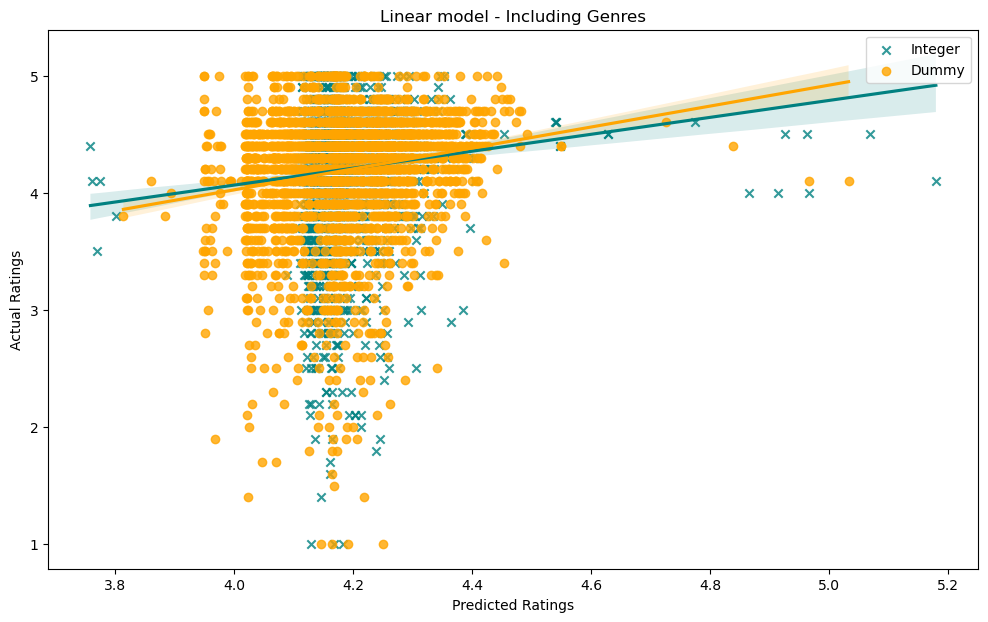

In [226]:
plt.figure(figsize=(12,7))
sns.regplot(x=results, y=y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(x=results_d, y=y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [227]:
print ('Integer encoding(mean) :' + str(results.mean()))
print ('Dummy encoding(mean) :'+ str(results_d.mean()))
print ('Integer encoding(std) :' + str(results.std()))
print ('Dummy encoding(std) :'+ str(results_d.std()))

Integer encoding(mean) :4.188527910288486
Dummy encoding(mean) :4.188081993524382
Integer encoding(std) :0.07227470840048048
Dummy encoding(std) :0.10325685035673154


---

## SVM - ex genres / category- int

In [228]:
svm_results = pd.DataFrame()

In [229]:
#Excluding genres
from sklearn import svm
#Integer encoding

X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train,y_train)
svm_res = model2.predict(X_test)

In [230]:
svm_results = svm_results.from_dict(evaluation_matrix_dict(y_test,svm_res, name = 'SVM - Integer'), orient='index')
svm_results = svm_results.transpose()
svm_results

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,SVM - Integer,0.264068,0.343024,0.012977


In [231]:
#dummy based
X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'], axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train_d,y_train_d)
svm_res_d = model2.predict(X_test_d)

In [232]:
svm_results2 = pd.DataFrame()
svm_results2 = svm_results2.from_dict(evaluation_matrix_dict(y_test_d,svm_res_d, name = 'SVM - Dummy'), orient='index')
svm_results2 = svm_results2.transpose()
svm_results2

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,SVM - Dummy,0.258937,0.349595,0.01266


In [233]:
combined_svm1 = pd.concat([svm_results, svm_results2], axis=0)
combined_svm1

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,SVM - Integer,0.264068,0.343024,0.012977
0,SVM - Dummy,0.258937,0.349595,0.01266


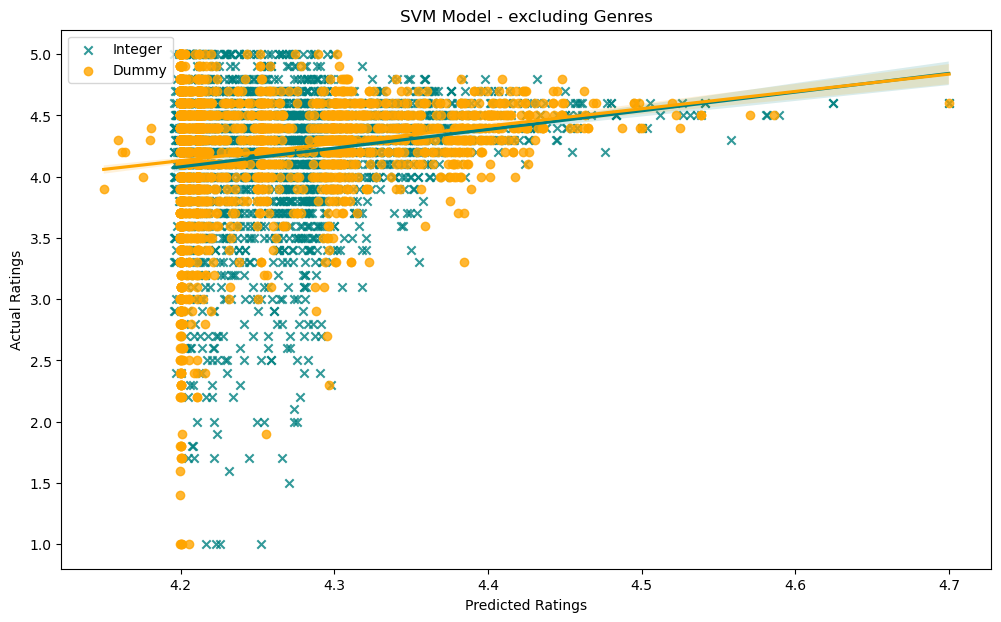

In [234]:
plt.figure(figsize=(12,7))
sns.regplot(x=svm_res, y=y_test, color='teal', label='Integer', marker='x')
sns.regplot(x=svm_res_d, y=y_test_d, color='orange', label='Dummy')
plt.legend()
plt.title('SVM Model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [235]:
#Integer encoding, including Genres_c
model2a = svm.SVR()

X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model2a.fit(X_train,y_train)

svm_res2 = model2a.predict(X_test)

In [236]:
#evaluation
svm_results3 = pd.DataFrame()
svm_results3 = svm_results3.from_dict(evaluation_matrix_dict(y_test,svm_res2, name = 'SVM - Integer'), orient='index')
svm_results3 = svm_results3.transpose()
svm_results3

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,SVM - Integer,0.259595,0.342052,0.01282


In [237]:

#dummy encoding, including Genres_c
model2a = svm.SVR()

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

model2a.fit(X_train_d,y_train_d)

svm_res_d2 = model2a.predict(X_test_d)


In [238]:
#evaluation
svm_results4 = pd.DataFrame()
svm_results4 = svm_results4.from_dict(evaluation_matrix_dict(y_test_d,svm_res_d, name = 'SVM - Dummy'), orient='index')
svm_results4 = svm_results4.transpose()
svm_results4

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,SVM - Dummy,0.285818,0.359339,0.014371


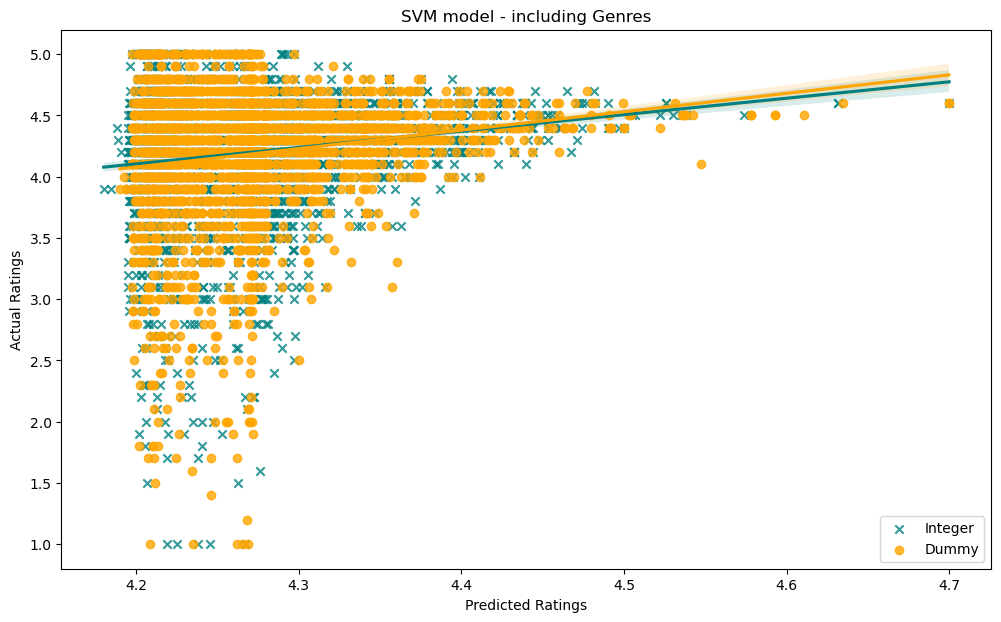

In [239]:
plt.figure(figsize=(12,7))
sns.regplot(x=svm_res2, y=y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(x=svm_res_d2, y=y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('SVM model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [240]:
print ('Integer encoding(mean) :' + str(svm_res2.mean()))
print ('Dummy encoding(mean) :'+ str(svm_res_d2.mean()))
print ('Integer encoding(std) :' + str(svm_res2.std()))
print ('Dummy encoding(std) :'+ str(svm_res_d2.std()))

Integer encoding(mean) :4.272235918180115
Dummy encoding(mean) :4.272637790881621
Integer encoding(std) :0.06213114006203662
Dummy encoding(std) :0.05982366129351488


In [241]:
# from faker import Faker
# import csv

# fake = Faker()

# # 고객 정보 데이터 생성
# with open('Customers.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["CustomerID", "FirstName", "LastName", "Email", "PhoneNumber", "Address", "City", "ZipCode"])

#     for _ in range(50):
#         writer.writerow([fake.random_int(min=1, max=1000), fake.first_name(), fake.last_name(), fake.email(), fake.phone_number(), fake.street_address(), fake.city(), fake.zipcode()])

# # 판매 기록 데이터 생성
# with open('Sales.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["SaleID", "ProductID", "CustomerID", "Date", "Quantity", "Price", "Total"])

#     for _ in range(50):
#         product_id = fake.random_int(min=1, max=100)
#         customer_id = fake.random_int(min=1, max=1000)
#         quantity = fake.random_int(min=1, max=10)
#         price = round(fake.random_number(digits=2), 2)
#         total = quantity * price
#         writer.writerow([fake.random_int(min=1, max=1000), product_id, customer_id, fake.date(), quantity, price, total])

# # 제품 목록 데이터 생성
# with open('Products.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["ProductID", "ProductName", "ProductDescription", "Category", "Price", "Stock"])

#     for _ in range(50):
#         writer.writerow([fake.random_int(min=1, max=100), fake.word(), fake.sentence(), fake.word(), round(fake.random_number(digits=2), 2), fake.random_int(min=1, max=1000)])
